Visualizar 

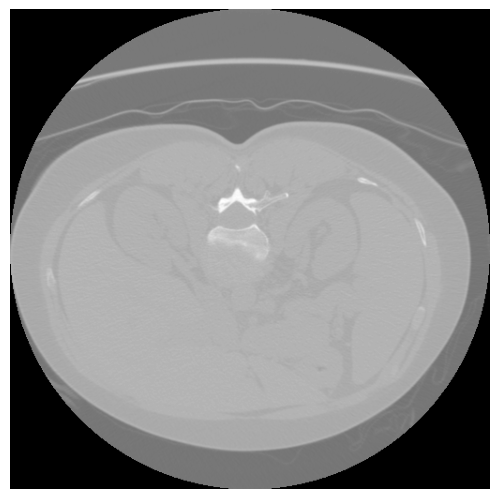

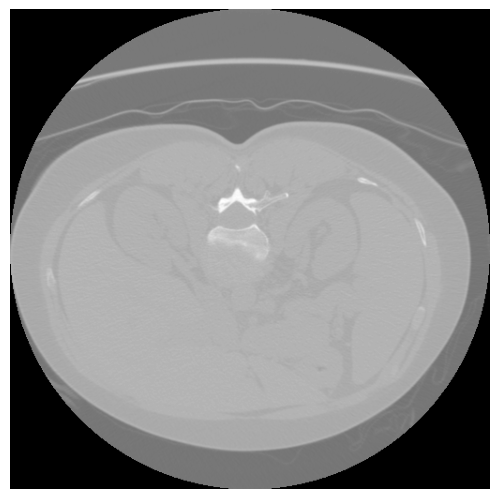

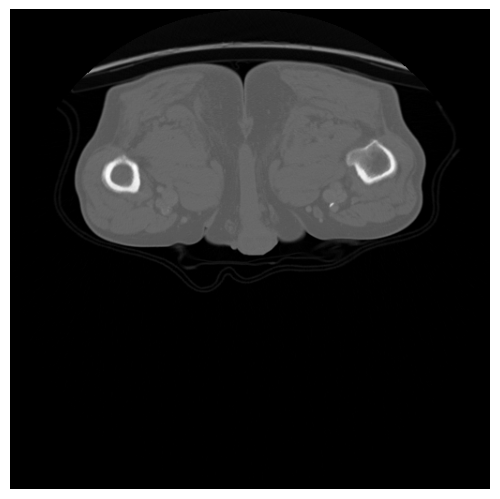

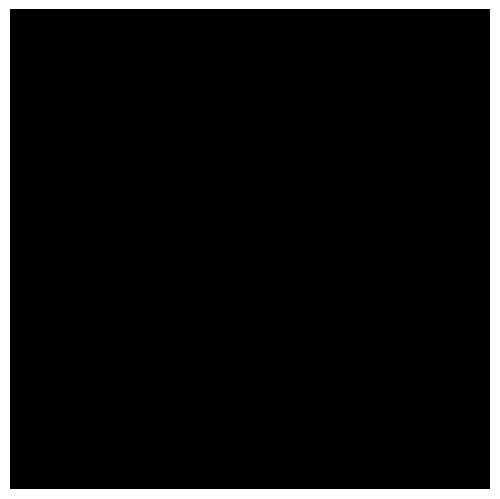

In [26]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Carregar a imagem NRRD
file_path = r'ImagensRadiomica\LIDC-IDRI-0002\01-01-2000-NA-NA-98329\3000522.000000-NA-04919\ConversaoFeita\1-261.nrrd'
image = sitk.ReadImage(file_path)

image_array = sitk.GetArrayFromImage(image)

fig, ax = plt.subplots()
ax.imshow(image_array[0, :, :], cmap='gray', origin='lower')
ax.axis('off') 
# Ajustar os espaçamentos ao redor da imagem
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Exibir a imagem
plt.show()


# Carregar a imagem DCM
file_path = r'ImagensRadiomica\LIDC-IDRI-0002\01-01-2000-NA-NA-98329\3000522.000000-NA-04919\1-261.dcm'
image = sitk.ReadImage(file_path)

# Converter a imagem para um array NumPy
image_array = sitk.GetArrayFromImage(image)

# Criar uma figura sem borda
fig, ax = plt.subplots()
ax.imshow(image_array[0, :, :], cmap='gray', origin='lower')
ax.axis('off')  # Desliga os eixos

# Ajustar os espaçamentos ao redor da imagem
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Exibir a imagem
plt.show()






# Carregar a imagem DCM
file_path = r'Software for qualitative assesment\test_data\pat1\image.nrrd'
image = sitk.ReadImage(file_path)

# Converter a imagem para um array NumPy
image_array = sitk.GetArrayFromImage(image)

# Criar uma figura sem borda
fig, ax = plt.subplots()
ax.imshow(image_array[0, :, :], cmap='gray', origin='lower')
ax.axis('off')  # Desliga os eixos

# Ajustar os espaçamentos ao redor da imagem
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Exibir a imagem
plt.show()







# Carregar a imagem DCM
file_path = r'Automatic segmentation script\produced segmentations\pat1_(DL)\DL_mask.nrrd'
image = sitk.ReadImage(file_path)

# Converter a imagem para um array NumPy
image_array = sitk.GetArrayFromImage(image)

# Criar uma figura sem borda
fig, ax = plt.subplots()
ax.imshow(image_array[0, :, :], cmap='gray', origin='lower')
ax.axis('off')  # Desliga os eixos

# Ajustar os espaçamentos ao redor da imagem
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Exibir a imagem
plt.show()

In [29]:
import nrrd
import os
import numpy as np

def combine_nrrds(directory, output_file="output.nrrd"):
    """
    Combines all NRRD files in a directory into a single NRRD file.

    Args:
        directory: The directory containing the NRRD files to be combined.
        output_file: The name of the output NRRD file.

    Returns:
        A combined NRRD file.
    """

    # List NRRD files in the directory.
    nrrd_files = [f for f in os.listdir(directory) if f.endswith(".nrrd")]

    # Check if there are any NRRD files in the directory.
    if not nrrd_files:
        print("No NRRD files found in the directory.")
        return

    # Read the first NRRD file to get header information.
    first_nrrd_file = nrrd.read(os.path.join(directory, nrrd_files[0]))

    # Create a new array to store the combined data.
    combined_data = first_nrrd_file[0]

    # Loop through the remaining NRRD files and append their data.
    for nrrd_file in nrrd_files[1:]:
        data, header = nrrd.read(os.path.join(directory, nrrd_file))
        combined_data = np.concatenate((combined_data, data), axis=-1)

    # Save the combined NRRD file.
    nrrd.write(output_file, combined_data, header=first_nrrd_file[1])

if __name__ == "__main__":
    # Directory containing the NRRD files to be combined.
    directory = r'ImagensRadiomica\LIDC-IDRI-0002\01-01-2000-NA-NA-98329\3000522.000000-NA-04919\ConversaoFeita'

    # Combine the NRRD files.
    combine_nrrds(directory)
